In [106]:
import pandas as pd
def horvath_function(mult_sum):
    const=0.695507258
    BA= (mult_sum+const)*21+20
    return BA

In [107]:
#Albert will provide all clocks in CSV format
horvath=pd.read_csv('horvath.csv',index_col=0)

In [108]:
#eaxmple epigenetic sample data online: GSM491937
dnam_sample_file='https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM491nnn/GSM491937/suppl/GSM491937.txt.gz'
dnam=pd.read_table(dnam_sample_file,index_col=0,usecols=[0,1])

In [109]:
df=horvath.merge(dnam,left_index=True,right_index=True)

In [110]:
df['mult']=df['CoefficientTraining']*df['Beta']

In [111]:
mult_sum=df.mult.sum()

In [112]:
BA=horvath_function(mult_sum)
BA

62.855688638421434

In [14]:
#eaxmple eigenetic series data online:
dnam_serie_file="https://ftp.ncbi.nlm.nih.gov/geo/series/GSE19nnn/GSE19711/matrix/GSE19711_series_matrix.txt.gz"

In [37]:
dnams=pd.read_table(dnam_serie_file,index_col=0,skiprows=74)

In [40]:
df=horvath.merge(dnams,left_index=True,right_index=True)

In [41]:
for c in df.columns[1:]:
    df[c]=df['CoefficientTraining']*df[c]
    

In [44]:
df_sum=df.drop('CoefficientTraining',axis=1).sum()

In [93]:
ages=pd.read_table(dnam_serie_file,index_col=0,skiprows=lambda x: x not in [30,40],nrows=1).T

In [94]:
ages['CA']=ages['!Sample_characteristics_ch1'].str[-2:].astype(int)

In [113]:
ages['BA']=[horvath_function(s) for s in df_sum.values]

!Sample_geo_accession,BA,CA
!Sample_geo_accession,,
BA,1.000000,0.583584
CA,0.583584,1.000000


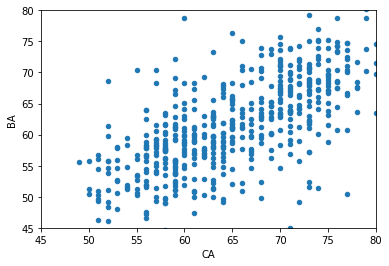

In [117]:
ages.plot.scatter('CA','BA', ylim=[45,80],xlim=[45,80])
ages[['BA','CA']].corr()